<a href="https://colab.research.google.com/github/nidhaloff/Regression_analysis_pytorch/blob/master/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import keras
from keras import backend as K
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from torch.autograd import Variable
%matplotlib inline

# run keras model on google GPU
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))
K.tensorflow_backend._get_available_gpus()

['/job:localhost/replica:0/task:0/device:GPU:0']

In [0]:

#Criate data for a y = 2x + 1 equation with noise
x_train = np.arange(0,10,.1).reshape(-1,1)
y_train = (2 * x_train + 1) + (np.random.randn(len(x_train))).reshape(-1,1)
#Turn the numpy arrays to float32 to avoid an error when converting to tensors
x_train = x_train.astype(np.float32)
y_train = y_train.astype(np.float32)

In [0]:
class LinearRegressionModel(nn.Module):

    def __init__(self, input_size, output_size):

        super(LinearRegressionModel, self).__init__()
    
        self.linear = nn.Linear(input_dim, output_dim)
    
    def forward(self, x):
        out = self.linear(x)
        return out

In [0]:
input_dim = x_train.shape[1]
output_dim = 1
#Create an instance of the NN
model = LinearRegressionModel(input_dim, output_dim)
#Define the loss function to MSE
criterion = nn.MSELoss()
#Learning rate and optimizer (SGD)
learning_rate = 0.0001
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [0]:
trainset = TensorDataset(torch.from_numpy(x_train).float(), torch.from_numpy(y_train).float())
loader = DataLoader(trainset, batch_size=16, shuffle=True)
def train(epochs=10):
    train_losses, test_losses, accuracy_list, iters = [], [], [], []
    total = 0
    count = 0
    for e in range(epochs):
        model.train()
        for x, y in loader:
            optimizer.zero_grad()
            out = model(x)
            loss = criterion(out, y)
            loss.backward()
            optimizer.step()
            # count += 1
            train_losses.append(loss.item())

        else:
            with torch.no_grad():
                model.eval()
                x_test = torch.from_numpy(x_train).float()
                y_test = torch.from_numpy(y_train).float()
                pred = model(x_test)
                loss = criterion(pred, y_test)
                test_losses.append(loss.item())
                score = r2_score(y_test.numpy(), pred.numpy())
                print("score: ", score)
                accuracy_list.append(score)

        print(f"epoch: {e} => train loss= {sum(train_losses)/len(train_losses)}, test loss= {sum(test_losses)/len(test_losses)}")

    return train_losses, test_losses, accuracy_list



In [54]:
train_losses, test_losses, accs = train(500)

score:  -7.5638174753468
epoch: 0 => train loss= 313.97247314453125, test loss= 270.4411315917969
score:  -6.772177751866901
epoch: 1 => train loss= 291.8109239850725, test loss= 257.9413375854492
score:  -6.028713243782492
epoch: 2 => train loss= 278.3014410109747, test loss= 245.94865926106772
score:  -5.381197236170038
epoch: 3 => train loss= 263.4332754952567, test loss= 234.84026336669922
score:  -4.819275429036005
epoch: 4 => train loss= 248.6387721470424, test loss= 224.62618103027344
score:  -4.267339612892993
epoch: 5 => train loss= 238.41457294282458, test loss= 214.9118169148763
score:  -3.815419394419834
epoch: 6 => train loss= 226.10281216368384, test loss= 205.93421064104353
score:  -3.381589227943765
epoch: 7 => train loss= 216.24670927865165, test loss= 197.48848915100098
score:  -2.9724993769966908
epoch: 8 => train loss= 207.63646213592045, test loss= 189.48416561550565
score:  -2.6219930774074416
epoch: 9 => train loss= 198.751254599435, test loss= 181.97382507324218

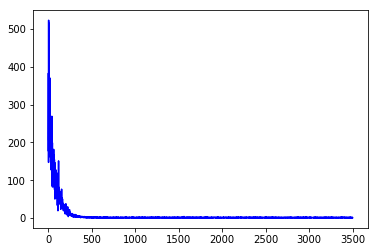

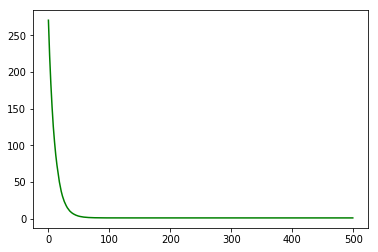

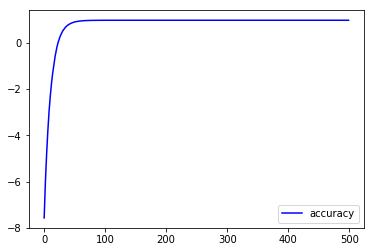

In [55]:
plt.plot(train_losses, color="b", label="train loss")
plt.show()

plt.plot(test_losses, color="g", label="test loss")
plt.show()
plt.plot(accs, color="b", label="accuracy")
plt.legend()
plt.show()


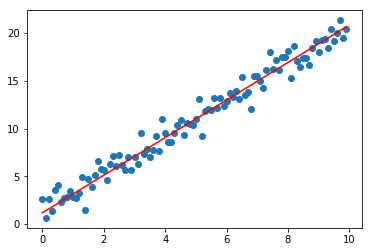

In [56]:
pred = model(torch.from_numpy(x_train).float()).detach().numpy()
plt.scatter(x_train, y_train)
plt.plot(x_train, pred, color="r")
plt.show()